In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/content/drive/MyDrive/신입기수 프로젝트/Dataset/')

In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm

In [5]:
df = pd.read_csv('rawdata.csv')

In [6]:
df = df[['청담대교_수위', '잠수교_수위', '한강대교_수위', '행주대교_수위']]

In [7]:
# 59개의 결측치 분포 살펴보기(청담대교_수위, 잠수교_수위, 한강대교_수위, 행주대교_유량, 행주대교_수위)
nanIndex = df[df['행주대교_수위'].isnull()].index
nanIndex

Int64Index([140613, 140614, 140615, 140616, 140617, 140618, 140619, 140620,
            140621, 140622, 140623, 140624, 140625, 140626, 140627, 140628,
            140629, 140630, 140631, 140632, 140633, 140634, 140635, 140636,
            140637, 140638, 140639, 140640, 140641, 140642, 140643, 140644,
            140645, 140646, 140647, 140648, 140649, 140650, 140651, 140652,
            140653, 140654, 140655, 140656, 140657, 140658, 140659, 140660,
            140661, 140662, 140663, 140664, 140665, 140666, 140667, 140668,
            140669, 140670, 236080],
           dtype='int64')

In [8]:
for i in df.columns.values:
  df[i] = df[i].interpolate()

In [9]:
df.isnull().sum()

청담대교_수위    0
잠수교_수위     0
한강대교_수위    0
행주대교_수위    0
dtype: int64

In [10]:
n = 5000

length = 6912
start = -6912
for i in df.columns.values:
  model = pm.auto_arima(df[i][start-n:start], seasonal = True)
  df[i][-6912:] = model.predict(length)

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [12]:
plt.rc('font', family='NanumBarunGothic') 

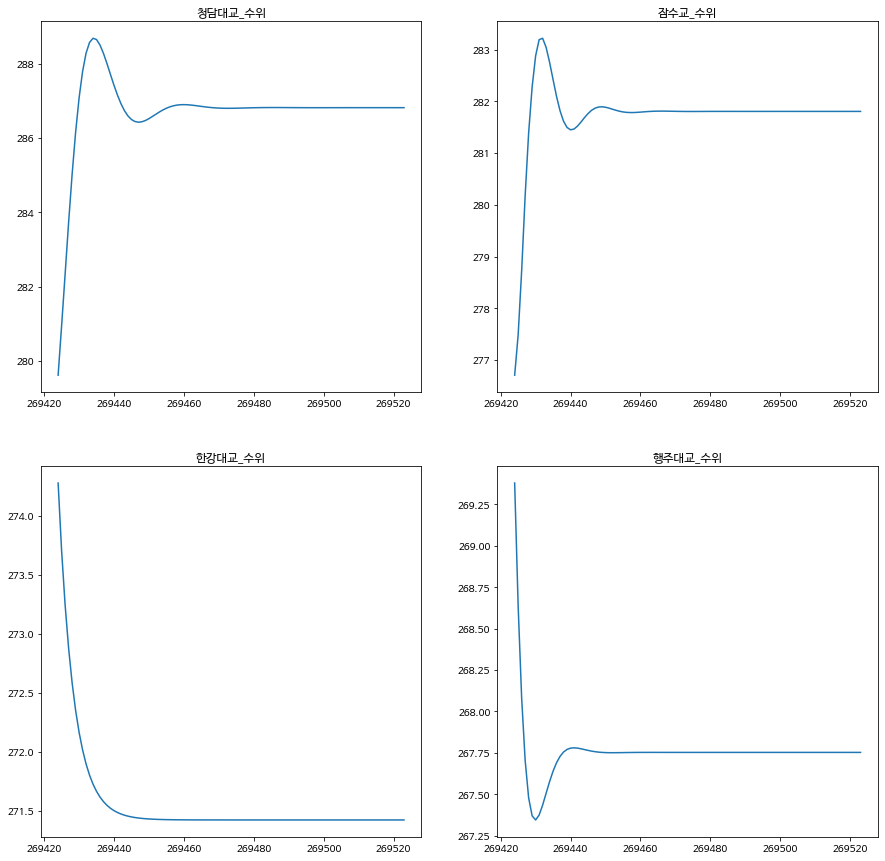

In [19]:
plt.figure(figsize=(15, 15))

x = df.index[-6912:-6812]
y1 = df[df.columns.values[0]][-6912:-6812]
y2 = df[df.columns.values[1]][-6912:-6812]
y3 = df[df.columns.values[2]][-6912:-6812]
y4 = df[df.columns.values[3]][-6912:-6812]

ax1 = plt.subplot(221)
ax1.set_title('청담대교_수위')
ax1.plot(x, y1)

ax1 = plt.subplot(222)
ax1.set_title('잠수교_수위')
ax1.plot(x, y2)

ax1 = plt.subplot(223)
ax1.set_title('한강대교_수위')
ax1.plot(x, y3)

ax1 = plt.subplot(224)
ax1.set_title('행주대교_수위')
ax1.plot(x, y4)

plt.show()

In [14]:
df

,청담대교_수위,잠수교_수위,한강대교_수위,행주대교_수위
0,310.700000,300.200000,290.000000,275.300000
1,314.700000,300.200000,290.000000,275.300000
2,313.700000,301.200000,290.000000,275.300000
3,311.700000,301.200000,290.000000,276.300000
4,311.700000,301.200000,291.000000,277.300000
...,...,...,...,...
276331,286.819809,281.805804,271.421579,267.753014
276332,286.819809,281.805804,271.421579,267.753014
276333,286.819809,281.805804,271.421579,267.753014
276334,286.819809,281.805804,271.421579,267.753014


In [15]:
sample_submission = pd.read_csv("Copy of sample_submission.csv")

sample_submission["wl_1018662"] = df.iloc[6912:, 0]
sample_submission["wl_1018680"] = df.iloc[6912:, 1]
sample_submission["wl_1018683"] = df.iloc[6912:, 2]
sample_submission["wl_1019630"] = df.iloc[6912:, 3]

sample_submission.to_csv("baseline.csv", index = False)

In [16]:
from glob import glob

ytest_list = sorted(glob("submission 임시/*.csv"))
ytest = []

for i in range(len(ytest_list)):
  tmp = pd.read_csv(ytest_list[i], encoding = 'cp949')
  ytest.append(np.array(tmp.iloc[:,1])*100)

In [17]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import backend as K
from sklearn.metrics import r2_score, mean_squared_error

predict = [df[i][-6912:] for i in df.columns.values]


score = []
print('Baseline 코드의 RMSE', end = '\n\n')
for i in range(4):
    print(f'{df.columns.values[i]}의 RMSE: ', round(mean_squared_error(ytest[i], predict[i], squared = False), 3))
    print(f'{df.columns.values[i]}의 R2 score: ', round(r2_score(predict[i], ytest[i]), 0), end = '\n\n')
    score.append(mean_squared_error(ytest[i], predict[i]))
    
print("최종점수: ", round(np.mean(score), 3))

Baseline 코드의 RMSE

청담대교_수위의 RMSE:  106.28
청담대교_수위의 R2 score:  -551557.0

잠수교_수위의 RMSE:  90.884
잠수교_수위의 R2 score:  -868756.0

한강대교_수위의 RMSE:  91.077
한강대교_수위의 R2 score:  -2538674.0

행주대교_수위의 RMSE:  70.401
행주대교_수위의 R2 score:  -7999223.0

최종점수:  8201.69


In [ ]:
df_arima['잠수교_수위'].interpolate()
df_arima['청담대교_수위'].interpolate()
df_arima['한강대교_수위'].interpolate()
df_arima['행주대교_수위'].interpolate()
df_arima['한강대교_유량'].interpolate()
df_arima['행주대교_유량'].interpolate()